In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from solver import Solver

In [2]:
def node_label(node) -> str:
    if node.bound.upper - node.bound.lower <= 1e-9:
        return f"{node.var.name} = {node.bound.upper}\nI={node.iteration} D={node.depth}"
    else:
        return f"{node.bound.lower}≤{node.var.name}≤{node.bound.upper}\nI={node.iteration} D={node.depth}"

def node_color(idx, node, origins):
    #print(node.var, node.iteration, node.bound)
    if idx in origins:
        return "green"
    elif node.bound.upper - node.bound.lower <= 1e-9:
        return "blue"
    elif node.var.is_general:
        return "yellow"
    return "magenta"

In [3]:
sl = Solver("problems/supportcase16.mps", True)
graphes = sl.start()
print(sl.result())

number of branching: 1	primal value: None	dual value: 271.9999999999999	number of infisible nodes: 0
number of branching: 2	primal value: None	dual value: 272.0	number of infisible nodes: 0
number of branching: 3	primal value: 306.0	dual value: 272.0	number of infisible nodes: 0
number of branching: 4	primal value: 306.0	dual value: 272.0	number of infisible nodes: 0
number of branching: 5	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 6	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 7	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 8	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 9	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 10	primal value: 306.0	dual value: 272.0	number of infisible nodes: 1
number of branching: 11	primal value: 306.0	dual value: 272.0	number of infisible nodes: 

In [4]:
def get_pos(nodes):
    graph = {}
    for node in nodes.values():
        if (node.depth, node.iteration) not in graph:
            graph[(node.depth, node.iteration)] = [node]
        else:
            graph[(node.depth, node.iteration)].append(node)

    gr = sorted(graph.items())

    current_x = 0
    current_y = 0
    x_step, y_step = 1, -1
    current_depth = 0
    res = {}
    for (depth, it), gr_nodes in gr:
        if depth == 0 and it == 0:
            current_y = -1
        if depth != current_depth:
            current_y = 0
        for node in gr_nodes:
            res[node_label(node)] = (current_x, current_y)
            current_x += x_step
        current_y += y_step
        current_depth = depth

    return res

In [5]:
for idx, (_, f) in enumerate(graphes):
    print(idx, f)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 True
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 True
28 False
29 False
30 False
31 True
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 True
40 False
41 True
42 False
43 True
44 False
45 False
46 False
47 False
48 False
49 True
50 False
51 False
52 False
53 False
54 False
55 True
56 False
57 False
58 True
59 True
60 False
61 True
62 False
63 True
64 False
65 False
66 False
67 False
68 False
69 True
70 False
71 True
72 False
73 True
74 False
75 True
76 False
77 False
78 False
79 False
80 False
81 True
82 False
83 True
84 False
85 False
86 False
87 True
88 False
89 True
90 False
91 True
92 False
93 False
94 False
95 True
96 True
97 True
98 False
99 False
100 False
101 False
102 False
103 True
104 False
105 True
106 False
107 False
108 False
109 True
110 False
111 True
112 False
113 True

True


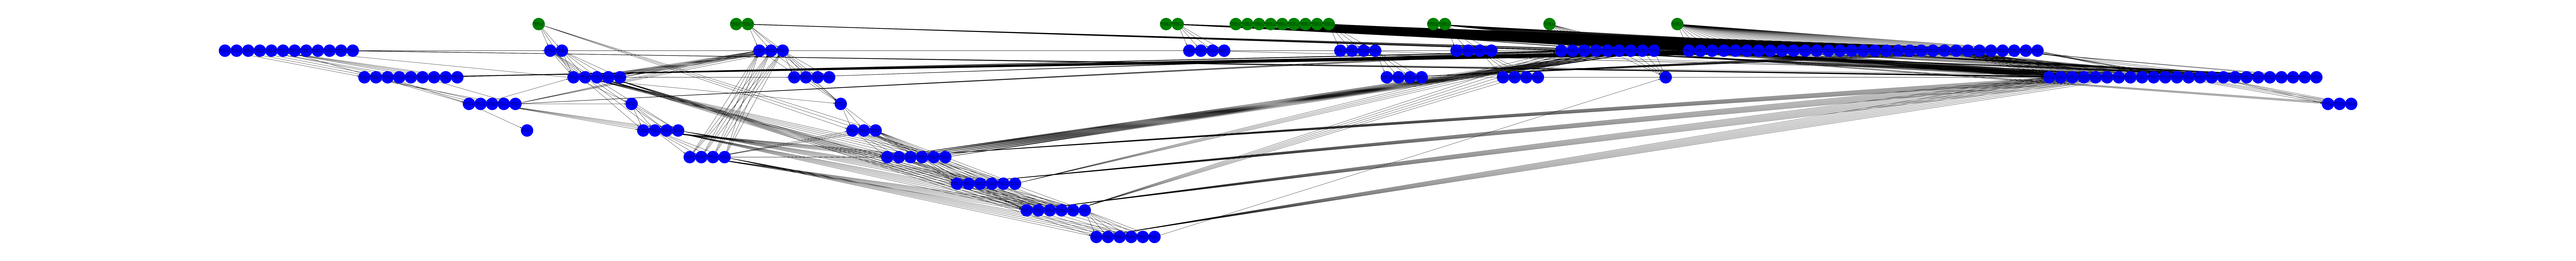

In [6]:
nodes, edges, origins = graphes[247][0].to_plot_info()
print(graphes[247][1])

G = nx.DiGraph()

for edge in edges:
    G.add_edge(node_label(nodes[edge[0]]), node_label(nodes[edge[1]]))

#pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
# pos = dict([(node_label(n), (n.depth, -n.iteration)) for n in nodes.values()])
# print(pos)
pos = get_pos(nodes)

plt.figure(3,figsize=(150,15)) 
nx.draw(G,
        pos,
        with_labels=True, 
        font_size=8, 
        node_size=2600, 
        node_color=[node_color(idx, node, origins) for idx, node in nodes.items()]
       )